In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("advertising.csv")
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [3]:
print("Row sayi :",df.shape[0])
print("Column sayi" ,df.shape[1])

Row sayi : 1000
Column sayi 10


In [4]:
def info1(df):
    A = []
    col = df.columns
    for i in col:
        tayp = df[i].dtypes
        nanique = df[i].nunique()
        isnull = df[i].isnull().sum()
        A.append([i,tayp,nanique,isnull])
    dff = pd.DataFrame(A,columns=['column_name','Type','Caunt_nunique','Count_isnull'])
    return dff
info1(df)

,column_name,Type,Caunt_nunique,Count_isnull
0,Daily Time Spent on Site,float64,900,0
1,Age,int64,43,0
2,Area Income,float64,1000,0
3,Daily Internet Usage,float64,966,0
4,Ad Topic Line,object,1000,0
5,City,object,969,0
6,Male,int64,2,0
7,Country,object,237,0
8,Timestamp,object,1000,0
9,Clicked on Ad,int64,2,0


In [5]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
df['Clicked on Ad'].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

In [7]:
df['Male'].value_counts()

Male
0    519
1    481
Name: count, dtype: int64

In [8]:
df['Country'].value_counts()

Country
France                                                 9
Czech Republic                                         9
Peru                                                   8
Turkey                                                 8
Greece                                                 8
                                                      ..
Romania                                                1
British Indian Ocean Territory (Chagos Archipelago)    1
Germany                                                1
Aruba                                                  1
Lesotho                                                1
Name: count, Length: 237, dtype: int64

# ===========================================
# Data Analysis

In [9]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


C:\Users\user2\AppData\Local\Temp\ipykernel_23704\1793586565.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Male' ,data=df ,palette='coolwarm')


<Axes: xlabel='Male', ylabel='count'>

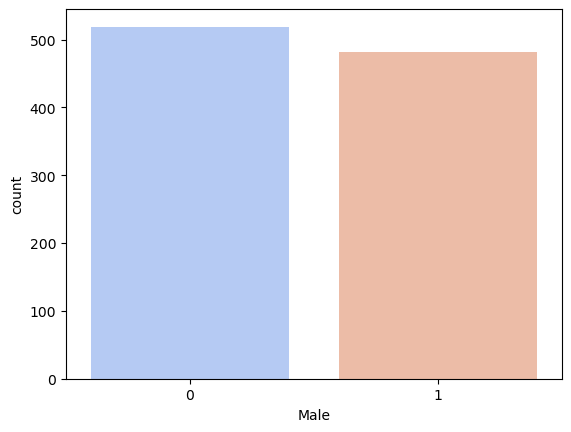

In [10]:
sns.countplot(x='Male' ,data=df ,palette='coolwarm')

<Axes: xlabel='Age', ylabel='Count'>

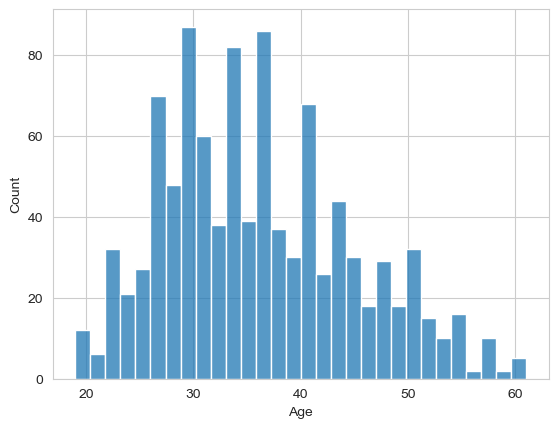

In [11]:
sns.set_style('whitegrid')
sns.histplot(df['Age'],bins=30)

<Axes: xlabel='Daily Time Spent on Site', ylabel='Count'>

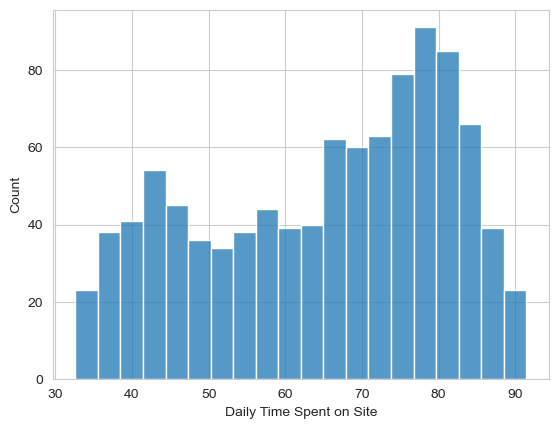

In [12]:
sns.histplot(df['Daily Time Spent on Site'],bins=20)

<Axes: xlabel='Age', ylabel='Area Income'>

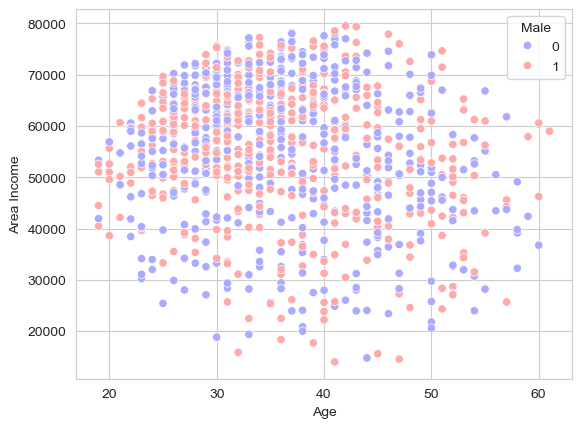

In [13]:
sns.scatterplot(x='Age' ,y = 'Area Income' ,data=df ,palette='bwr' ,hue='Male')

<Figure size 1500x1200 with 0 Axes>

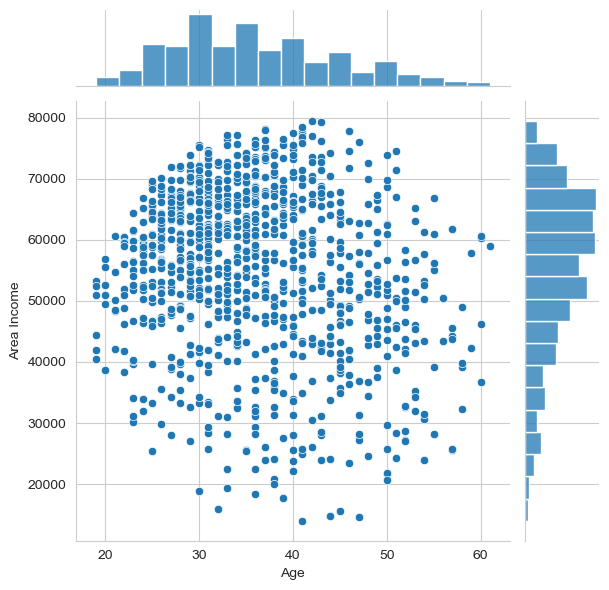

In [14]:
plt.figure(figsize=(15,12))
sns.jointplot(x='Age' ,y='Area Income' ,data=df)

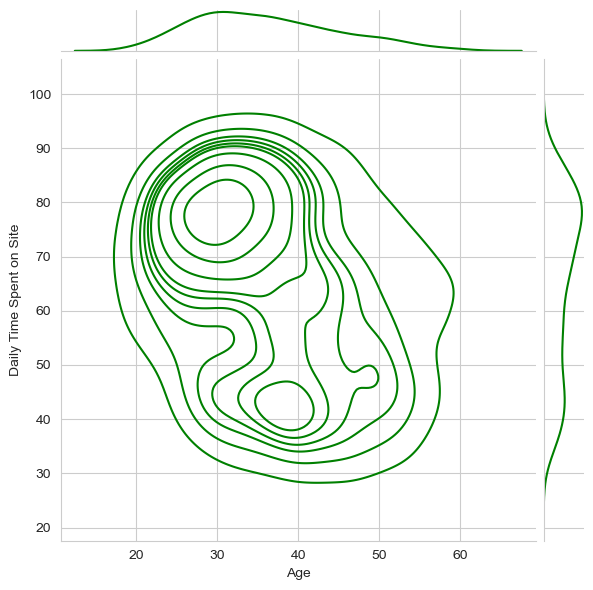

In [15]:
sns.jointplot(x='Age' ,y='Daily Time Spent on Site' ,data=df,kind='kde',color='green',ratio=10)

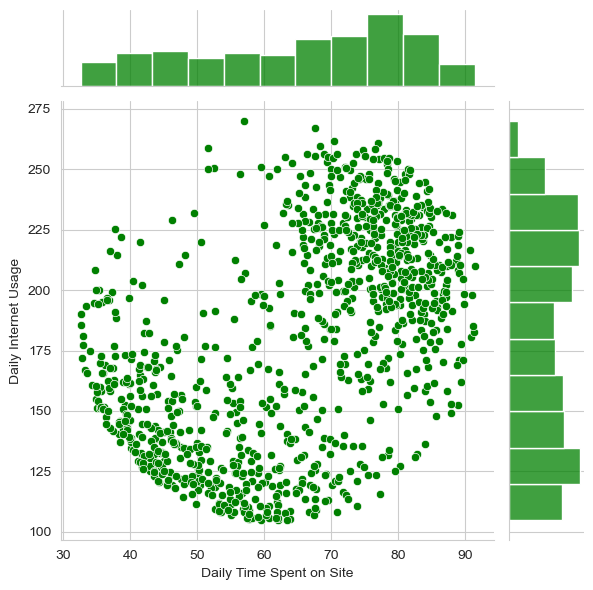

In [16]:
sns.jointplot(x = 'Daily Time Spent on Site' ,y = 'Daily Internet Usage' ,data=df,color='green')

C:\Users\user2\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


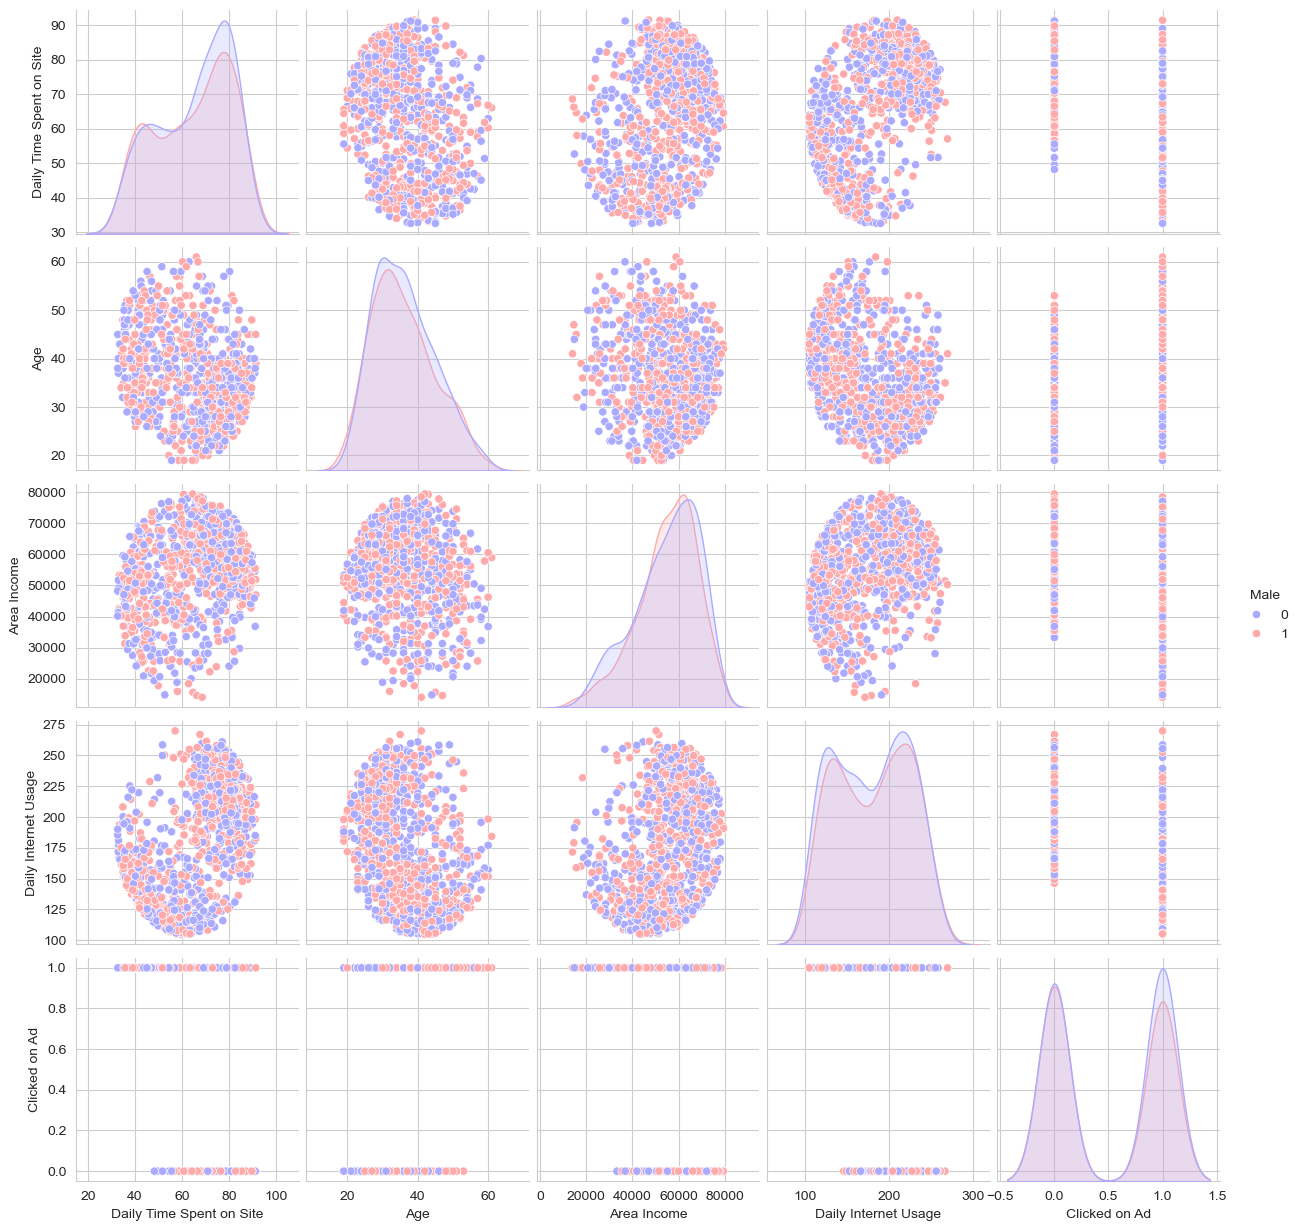

In [17]:
sns.pairplot(df,hue='Male' ,palette='bwr')

C:\Users\user2\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


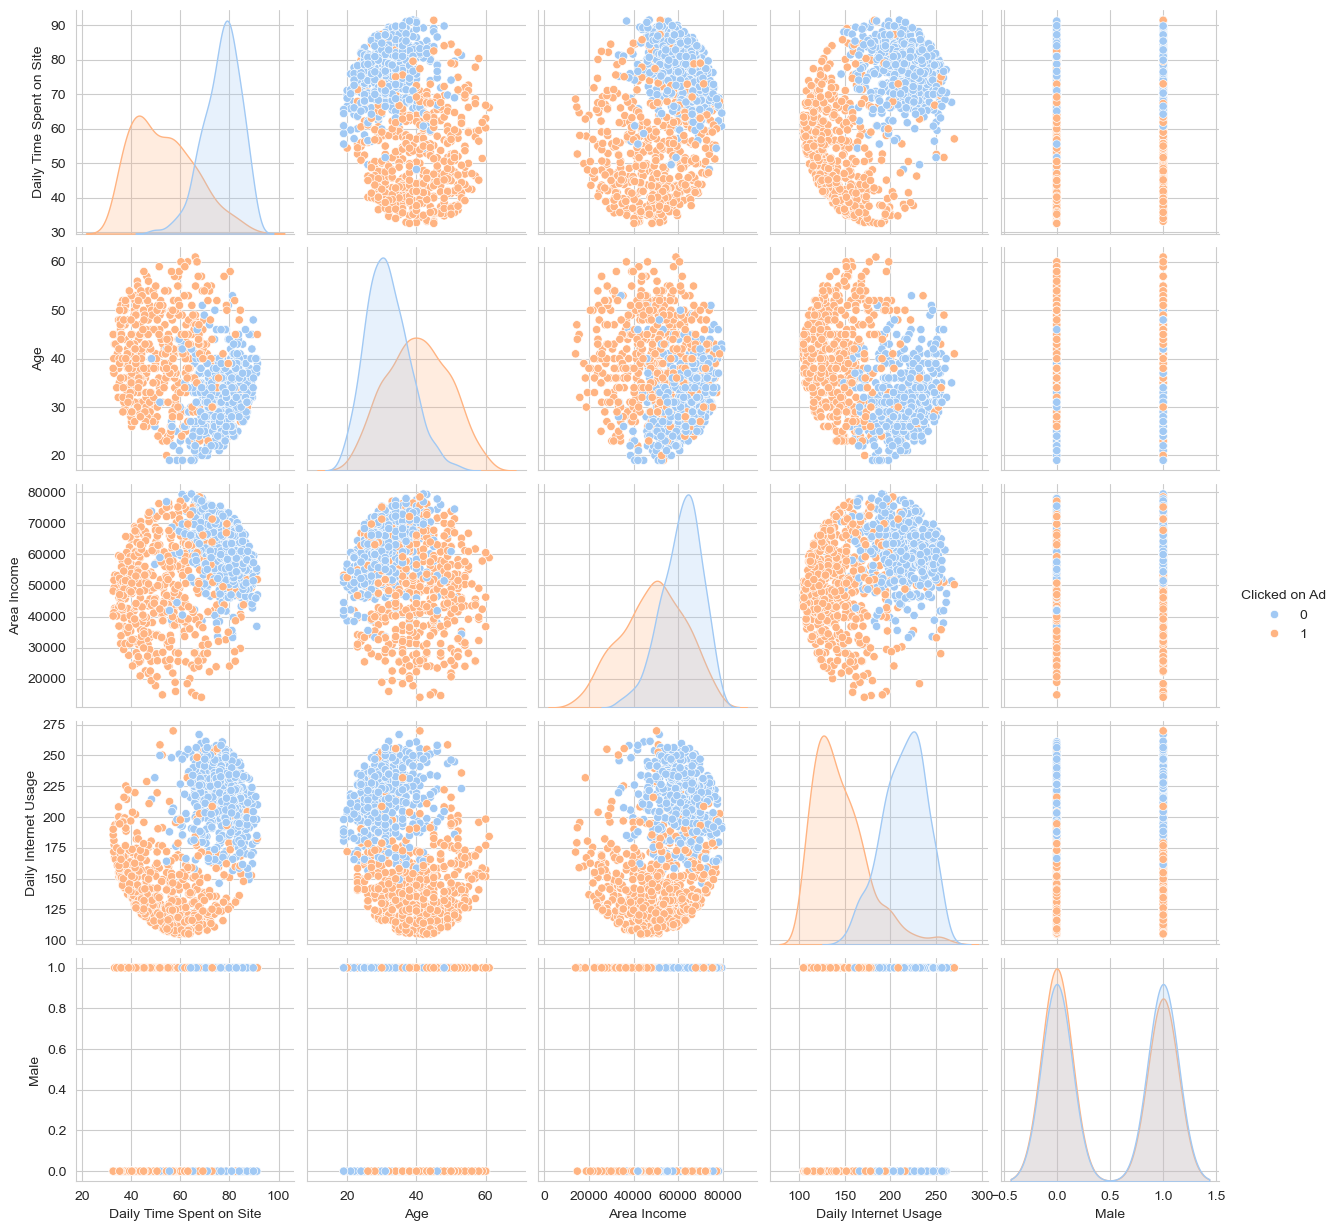

In [18]:
sns.pairplot(df ,hue='Clicked on Ad' ,palette='pastel')

<Axes: ylabel='Daily Time Spent on Site'>

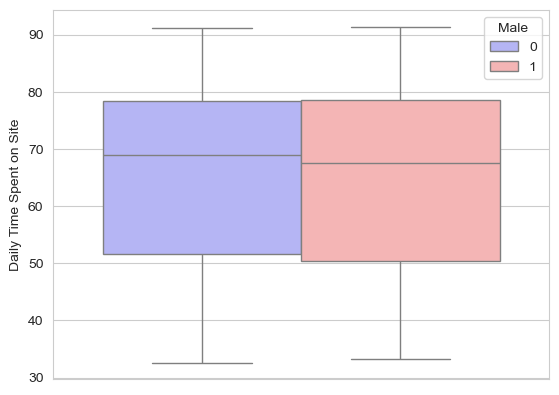

In [19]:
sns.boxplot(y='Daily Time Spent on Site' ,hue='Male',data=df ,palette='bwr')

<Axes: ylabel='Area Income'>

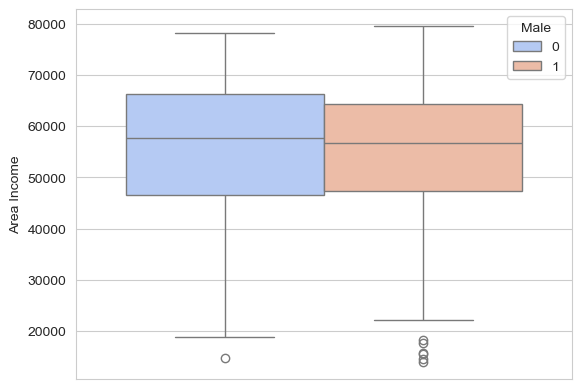

In [20]:
sns.boxplot(y='Area Income',data=df ,hue='Male', palette='coolwarm')

<Axes: xlabel='Daily Time Spent on Site', ylabel='Area Income'>

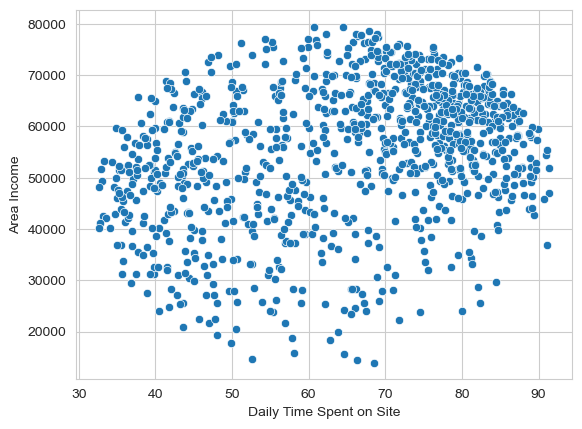

In [21]:
sns.scatterplot(y='Area Income' ,x='Daily Time Spent on Site' ,data=df)

In [22]:
df['City_runk'] = round(df['Daily Time Spent on Site']/df['Daily Internet Usage'],2)

In [23]:
df['Timestamp'].min()

'2016-01-01 02:52:10'

In [24]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,City_runk
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0.27
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0.41
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,0.29
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,0.30
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0.30


# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report 

In [26]:
X = df.drop(['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'],axis=1)
y = df['Clicked on Ad']

In [27]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test = train_test_split(X ,y ,random_state=42 ,test_size=0.2)

In [28]:
model = LogisticRegression()
model.fit(X_train ,y_train)

C:\Users\user2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
y_pred = model.predict(X_test)

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        89
           1       0.96      0.92      0.94       111

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



# =================================

In [31]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [32]:
model1 = LogisticRegression()
model1.fit(X_train_sc,y_train)

LogisticRegression()

In [33]:
y_pred = model1.predict(X_test_sc)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        89
           1       0.95      0.95      0.95       111

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [35]:
X_train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,City_runk
29,76.02,22,46179.97,209.82,0,0.36
535,78.76,32,70012.83,208.02,1,0.38
695,73.49,38,67132.46,244.23,0,0.30
557,79.67,28,58576.12,226.79,0,0.35
836,49.21,46,49206.40,115.60,0,0.43


# ====================================

In [36]:
sample = np.array([[76 , 56 ,50000 ,100 ,0 ,0.19]])
sample1 = np.array([[70 , 44 ,60000 ,220 ,0 , 0.35]])

In [37]:
model.predict(sample)

C:\Users\user2\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [38]:
model.predict_proba(sample)

C:\Users\user2\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.0110861, 0.9889139]])

# =================================

In [39]:
model.predict(sample1)

C:\Users\user2\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [40]:
model.predict_proba(sample1)

C:\Users\user2\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.78147442, 0.21852558]])

# ==============================

In [41]:
model1.predict(scaler.transform(sample))

C:\Users\user2\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)